Imports

In [675]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate
from copy import deepcopy

Method to print dataframe

In [676]:
def print_df(df: np.ndarray):
    print(tabulate(df, headers='keys', floatfmt=".12f", showindex=False))

Initalizing dependent and independent variable of the linear regression

In [677]:
x = np.random.randn(500)  

b_0 = 2 * np.random.randn()
b_1 = 7 + 1.5 * (np.random.randn())

noise = 2 * np.random.randn(500)

y = b_1 * x + b_0
y_noisy = y + noise

Method to draw regression plot with given parameters

In [678]:
def draw_reg(x, y, plot_data_list, title):
    plt.figure(figsize=(14,8))
    plt.grid(True)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('X', fontsize=12, fontweight='bold')
    plt.ylabel('Y', fontsize=12, fontweight='bold')  
        

    sns.scatterplot(x=x, y=y, color='#4b72c7',label='Sample data')
    for plot_data in plot_data_list:
        sns.lineplot(x=x, y=plot_data[0], label = plot_data[1], color = plot_data[2], linestyle = plot_data[3])
    
    plt.tight_layout()
    plt.show()

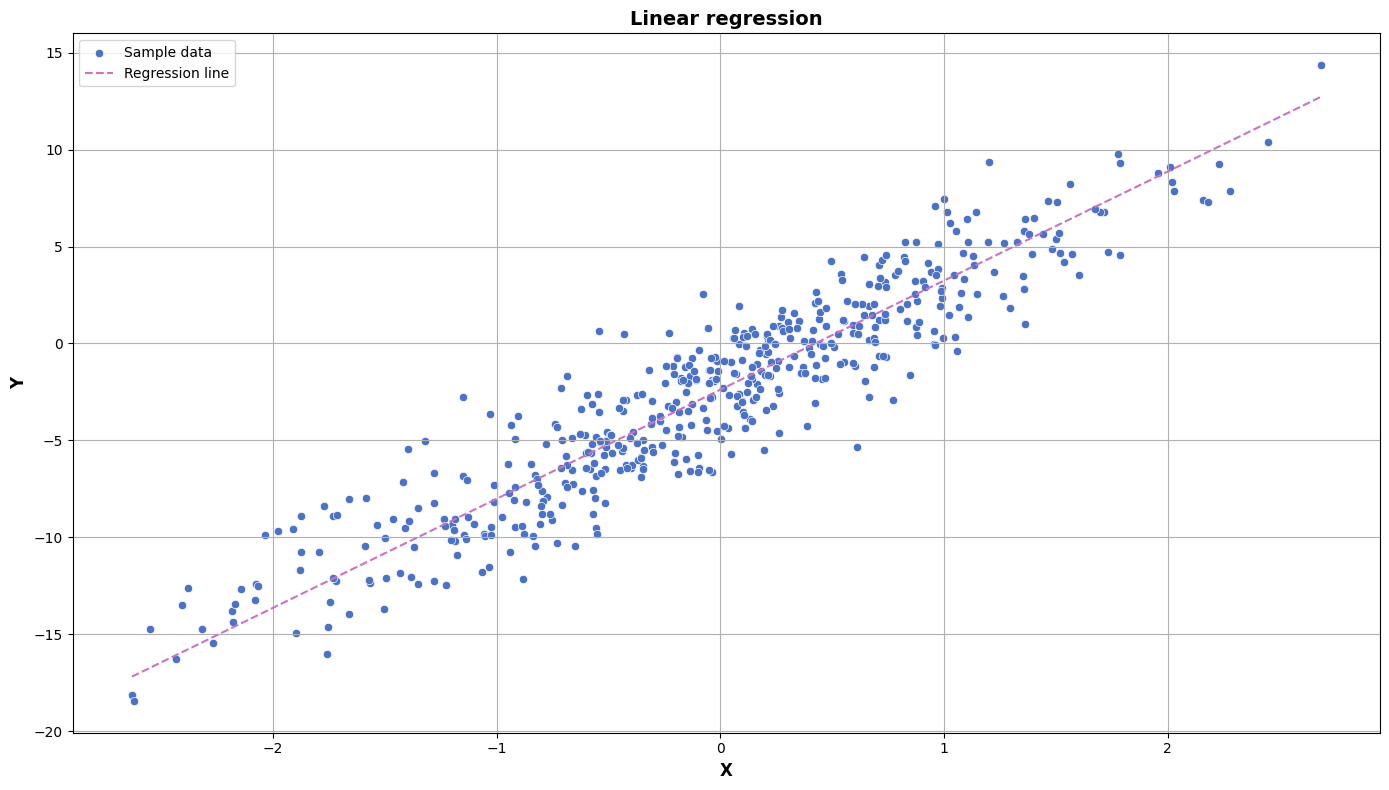

In [679]:
plt_data = [[y, "Regression line" ,'#cc72c2', '--']]
draw_reg(x, y_noisy, plt_data, "Linear regression")

Least squares method to calculate coefficients values:
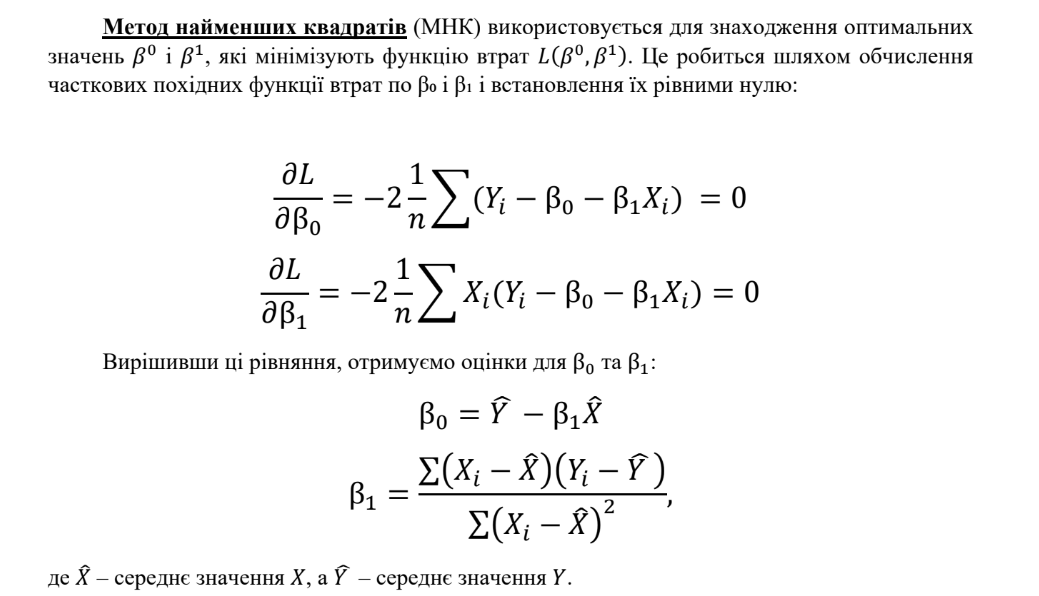

In [680]:
def least_squares_method(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b_1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
    b_0 = y_mean - b_1 * x_mean
    return b_0, b_1

In [681]:
b_0_ls, b_1_ls = least_squares_method(x, y_noisy)
print(f"b_0 coefficient calculated with least squares method: {b_0_ls}")
print(f"b_1 coefficient calculated with least squares method: {b_1_ls}")

b_0 coefficient calculated with least squares method: -2.4008959389445916
b_1 coefficient calculated with least squares method: 5.37708228410242


Another way to calculate coefficients by numpy.polifit method:

In [682]:
b_1_pf, b_0_pf = np.polyfit(x, y_noisy, 1)
print(f"b_0 coefficient calculated with numpy.polifit method: {b_0_pf}")
print(f"b_1 coefficient calculated with numpy.polifit method: {b_1_pf}")

b_0 coefficient calculated with numpy.polifit method: -2.400895938944592
b_1 coefficient calculated with numpy.polifit method: 5.3770822841024195


Comparison dataframe to compare results of two methods with initial coefficients

In [683]:
comparison_df = {
    "Coefficients calculation method": ["Initial coeffs", "Least squares", "numpy.polyfit"],
    "b0":[b_0, b_0_ls, b_0_pf],
    "b1":[b_1, b_1_ls, b_1_pf]
}

print_df(comparison_df)

Coefficients calculation method                 b0              b1
---------------------------------  ---------------  --------------
Initial coeffs                     -2.385102380119  5.627310766562
Least squares                      -2.400895938945  5.377082284102
numpy.polyfit                      -2.400895938945  5.377082284102


Adding methods visualization on plot

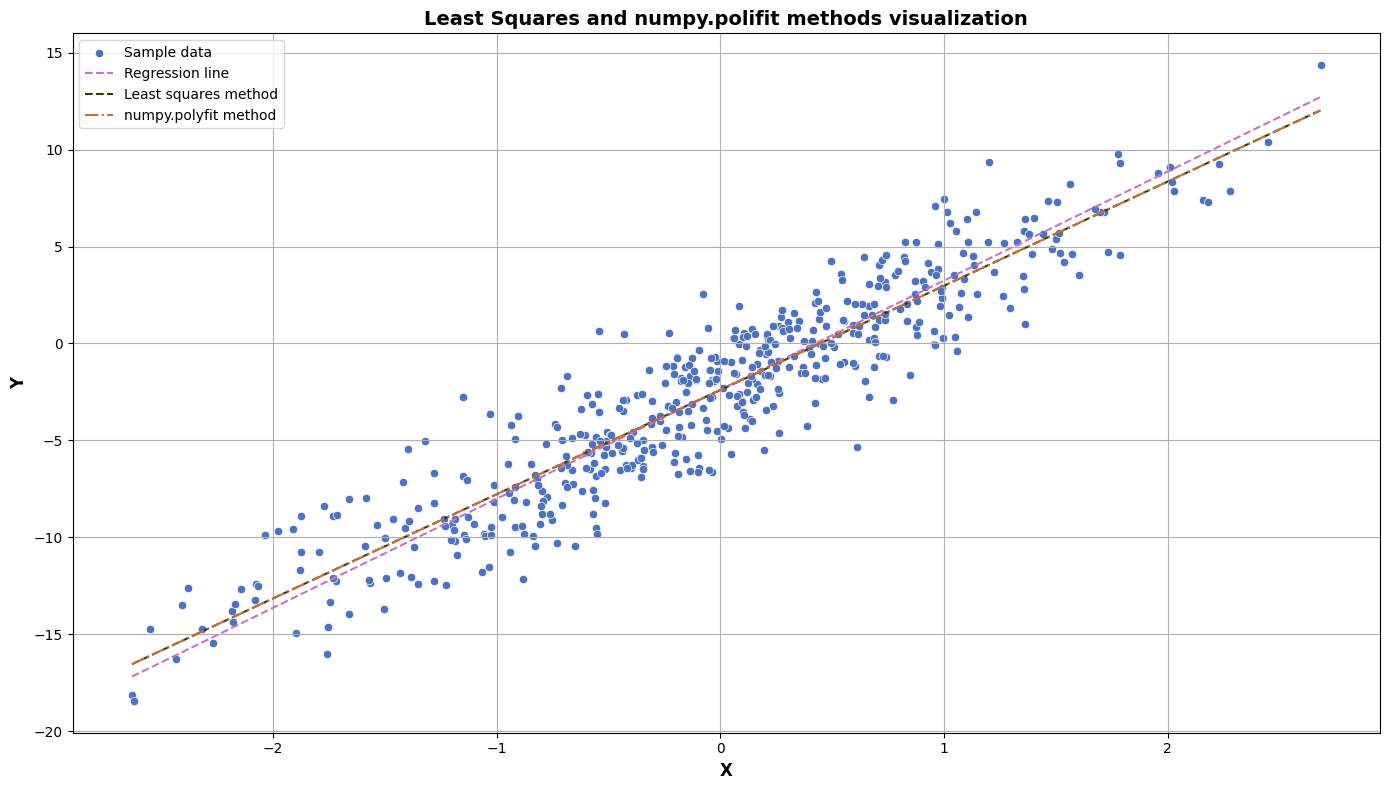

In [684]:
y_ls = b_0_ls + b_1_ls * x
y_pf = b_0_pf + b_1_pf *x

ls_set = [y_ls, 'Least squares method', '#373900', '--']
pf_set = [y_pf, 'numpy.polyfit method', '#c57037', '-.']
plt_data.extend([ls_set, pf_set])
draw_reg(x, y_noisy, plt_data, "Least Squares and numpy.polifit methods visualization")
plt.show()

Gradient descent method to calculate b_0 and b_1 coefficients:
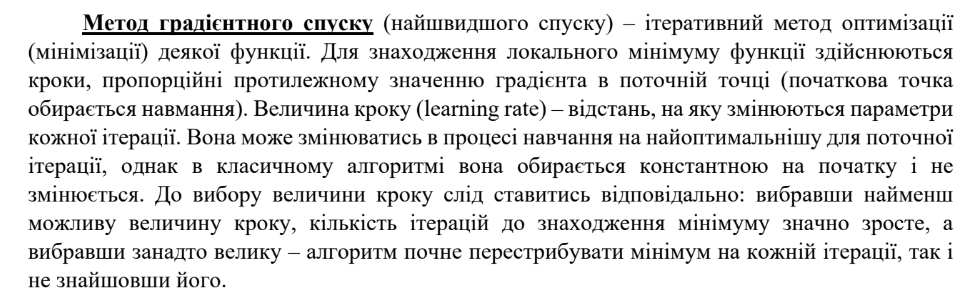
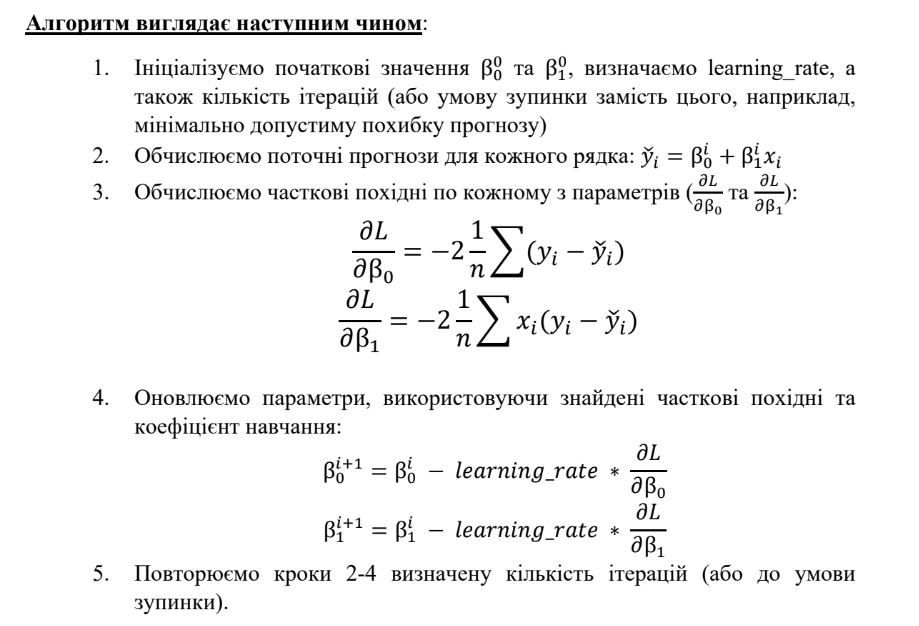

In [685]:
def gradient_descent_method(x, y, learning_rate, n_iter):
    b_0 = 0
    b_1 = 0
    
    for _ in range(n_iter):
        y_temp = b_0 + b_1 * x
        b_0_temp = -2 * np.sum(y - y_temp) / x.size
        b_1_temp = -2 * np.sum(x * (y - y_temp)) / x.size
        b_0 = b_0 - learning_rate * b_0_temp
        b_1 = b_1 - learning_rate * b_1_temp
    return b_0, b_1

In [686]:
b_0_grad, b_1_grad = gradient_descent_method(x, y_noisy, 0.1, 800)
print(f"b_0 and b_1 coefficients calculated by gradient descent method: {b_0_grad}, {b_1_grad}")

b_0 and b_1 coefficients calculated by gradient descent method: -2.4008959389445925, 5.377082284102417


Adding gradient descent to the plot

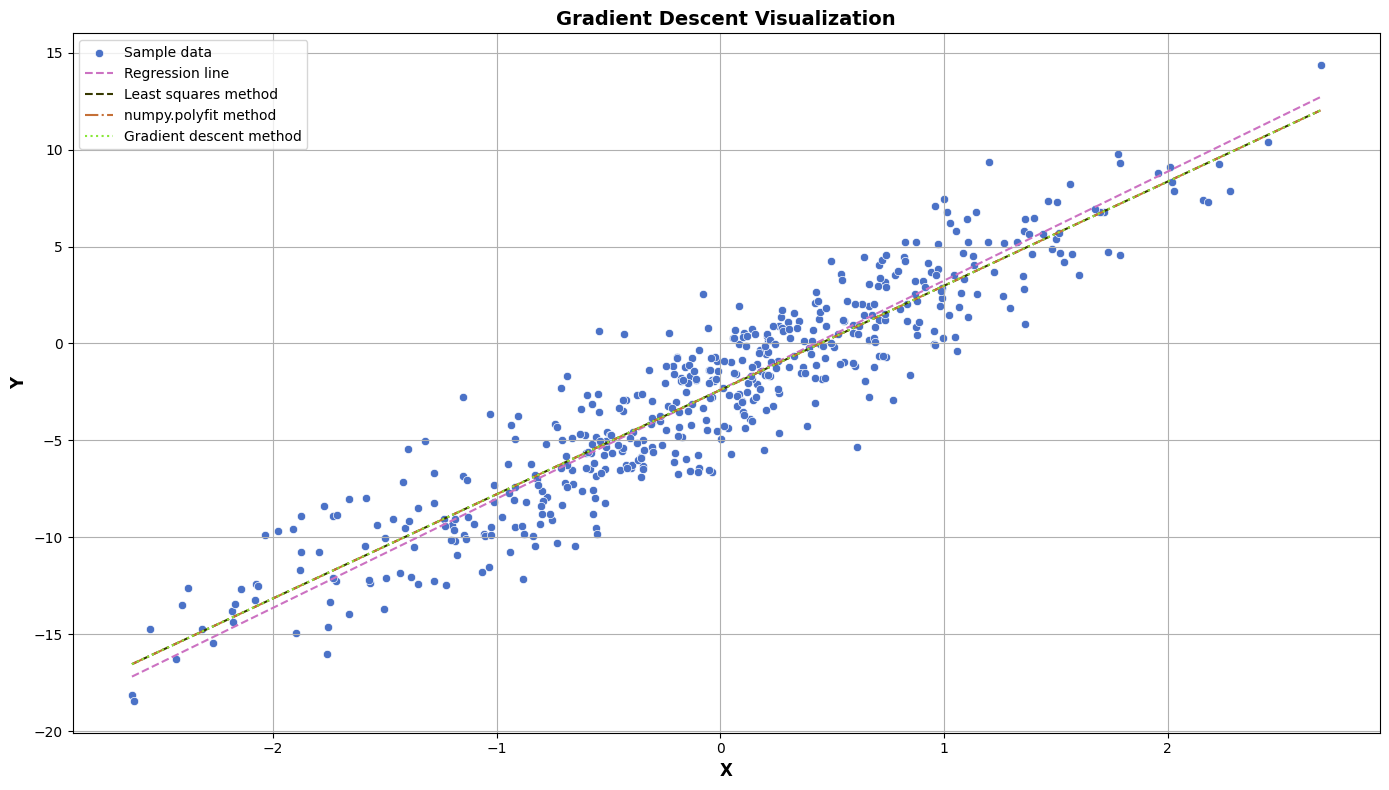

In [687]:
y_grad = b_0_grad + b_1_grad * x
grad_set = [y_grad, "Gradient descent method", '#88e837', ':']
plt_data.extend([grad_set])
draw_reg(x, y_noisy, plt_data, "Gradient Descent Visualization")
plt.show()

Method to calculate mean squared error

In [688]:
def mse(x, y, b_0, b_1):
    return np.sum((y - (b_0 + b_1 * x))**2) / x.size

MSE visualization

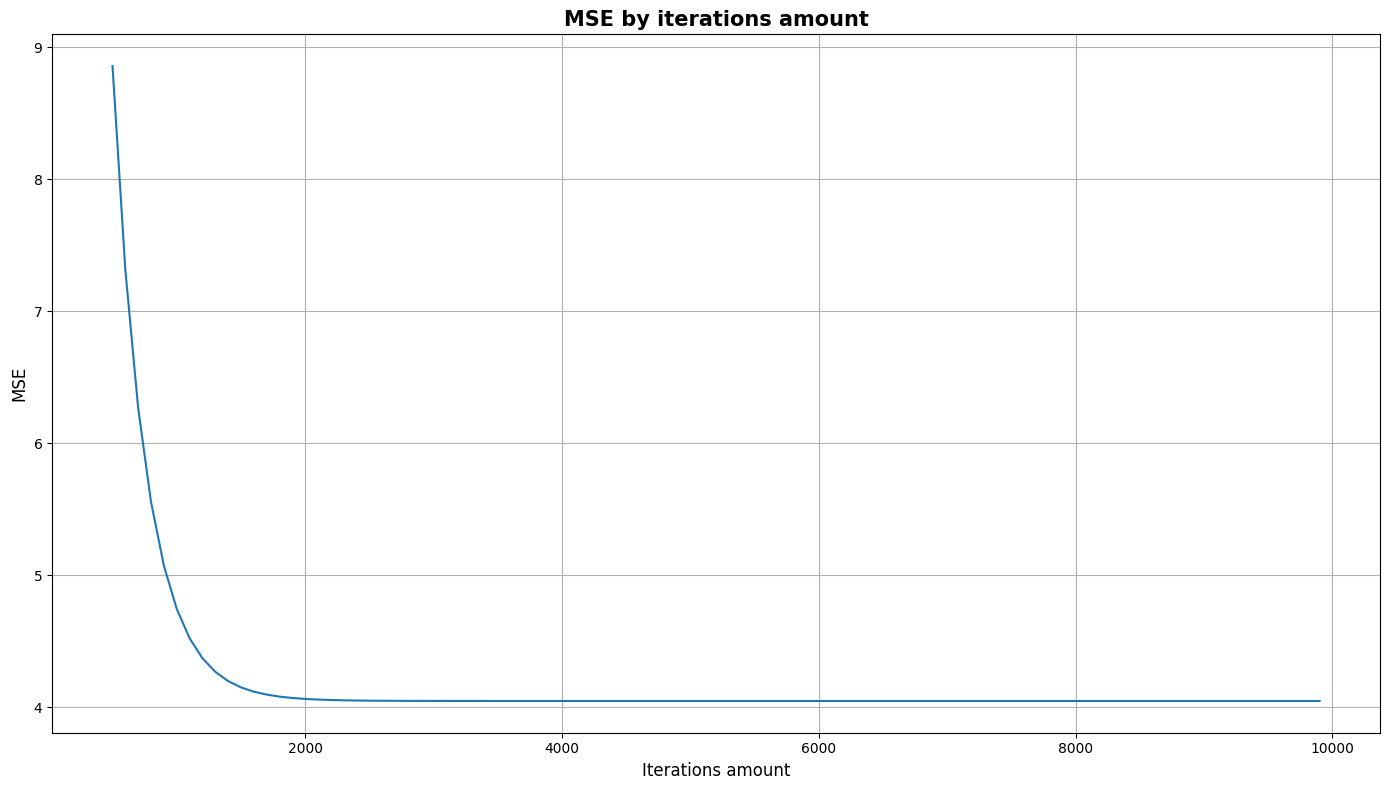

In [689]:
iters_count = []
errors = []
for i in range(500, 10000, 100):
    errors.append(mse(x, y_noisy, *gradient_descent_method(x, y_noisy, 0.001, i)))
    iters_count.append(i)

plt.figure(figsize=(14,8))

sns.lineplot(x = iters_count, y = errors)

plt.grid(True)
plt.title("MSE by iterations amount", fontsize=15, fontweight='bold')
plt.xlabel('Iterations amount', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.tight_layout()
plt.show()

Comparing results with the previous two methods

In [690]:
copy = deepcopy(comparison_df)
copy['Coefficients calculation method'].append('Gradient descent')
copy['b0'].append(b_0_grad)
copy['b1'].append(b_1_grad)
print_df(copy)

Coefficients calculation method                 b0              b1
---------------------------------  ---------------  --------------
Initial coeffs                     -2.385102380119  5.627310766562
Least squares                      -2.400895938945  5.377082284102
numpy.polyfit                      -2.400895938945  5.377082284102
Gradient descent                   -2.400895938945  5.377082284102
